<a href="https://colab.research.google.com/github/Chanura04/Maths-CW/blob/main/20240955.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Modelling Travel Time

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import latex
from IPython.display import display, Math
import cv2

In [3]:
x=sp.symbols('x')
y=sp.symbols('y')
a=sp.symbols('a')
b=sp.symbols('b')
c=sp.symbols('c')
T=sp.symbols('∇T')

In [4]:
T_b=a *( x**2) + b * (y**2)
print(f"T_b(x,y)= {latex(T_b)}")


T_b(x,y)= a x^{2} + b y^{2}


In [5]:
T_t= sp.sqrt(c * (x **2 + y**2))
print("T_t(x,y)=",T_t)

T_t(x,y)= sqrt(c*(x**2 + y**2))


In [6]:
diff_T_b_by_x=sp.diff(T_b,x)
print("Partial derivative of travelling time by bus ,with respect to x  \n")

print(f"∂T/∂x= {latex(diff_T_b_by_x)}")

Partial derivative of travelling time by bus ,with respect to x  

∂T/∂x= 2 a x


In [7]:
diff_T_b_by_y=sp.diff(T_b,y)
print("Partial derivative of travelling time by bus ,with respect to y  \n")

print(f"∂T/∂y= {latex(diff_T_b_by_y)}")

Partial derivative of travelling time by bus ,with respect to y  

∂T/∂y= 2 b y


In [8]:
#Calculate Gradient value for bus
gradient_latex = f"{T}_b =( {latex(diff_T_b_by_x)} , {latex(diff_T_b_by_y)})"
print(gradient_latex)

∇T_b =( 2 a x , 2 b y)


In [9]:
diff_T_t_by_x=sp.diff(T_t,x)
print("Partial derivative of travelling time by taxi ,with respect to 𝑥  \n")
print(f"∂T/∂x= \n")
sp.simplify(diff_T_t_by_x)
#print(f"T_t_by_x= {diff_T_t_by_x}")

Partial derivative of travelling time by taxi ,with respect to 𝑥  

∂T/∂x= 



x*sqrt(c*(x**2 + y**2))/(x**2 + y**2)

In [10]:
diff_T_t_by_y=sp.diff(T_t,y)
print("Partial derivative of travelling time by taxi ,with respect to y  \n")
print(f"∂T/∂y= \n")
sp.simplify(diff_T_t_by_y)
#print(f"T_t_by_y= {diff_T_t_by_y}")

Partial derivative of travelling time by taxi ,with respect to y  

∂T/∂y= 



y*sqrt(c*(x**2 + y**2))/(x**2 + y**2)

In [11]:
#Calculate Gradient value for taxi
gradient_latex = f"\\nabla T_t = \\left( {latex(diff_T_t_by_x)},\\ {latex(diff_T_t_by_y)} \\right)"
display(Math(gradient_latex))

<IPython.core.display.Math object>

### Interpretation for bus travel time

In [12]:
rate_for_bus=diff_T_b_by_x / diff_T_b_by_y
sp.simplify(rate_for_bus)


a*x/(b*y)

```
x = total route distance (in km)
```

```
y = traffic delay factor (in minutes per km)
```
```
• a reflects the effect of distance on bus travel time (stops, boarding times).
• b reflects the effect of congestion on bus travel time.
• c is a proportionality constant converting combined effects into minutes for taxis.
```

*   If a>>b , then distance x has a bigger impact.
*   If b>>a , then traffic delay factor y has bigger impact.

   
**For this situation x= 4.5km is fixed.**

For these factors, We assume each bus stop people are getting equal time to get into the bus.

     Conclusion:-

  *    Since the problem specifies that the bus route include multiple stops, both the stops related to delays and traffic delays contribute to the b. Therefor b represent the overall higher impact.



### Interpretation for taxi travel time

In [13]:
rate_for_taxi=diff_T_t_by_x / diff_T_t_by_y
sp.pprint(rate_for_taxi)

x
─
y




*  According to result x and y has similar impact for the travel time. But in the problem distance has approximately fixed value. which is 4.5 km. However the only way for impact to travel time is variation of traffic delay.



## 2. Cost Analysis Using Integration

In [14]:
t=sp.symbols('t')
bus_express= 2 * t + 1
taxi_express= 3 * t + 2


print(f"F_bus =>  ∫ ( {latex(bus_express)} )dt  , Limit 0 to x \n")
print(f"F_taxi =>  ∫ ( {latex(taxi_express)} )dt  , Limit 0 to x")

F_bus =>  ∫ ( 2 t + 1 )dt  , Limit 0 to x 

F_taxi =>  ∫ ( 3 t + 2 )dt  , Limit 0 to x


In [15]:
f_bus=sp.integrate(bus_express,(t,0,x))
print(f"f_bus = {latex(f_bus)}")
# sp.simplify(f_bus)

f_bus = x^{2} + x


In [16]:
f_taxi=sp.integrate(taxi_express,(t,0,x))
print(f"f_taxi = \n\n")
sp.simplify(f_taxi)

f_taxi = 




x*(3*x + 4)/2

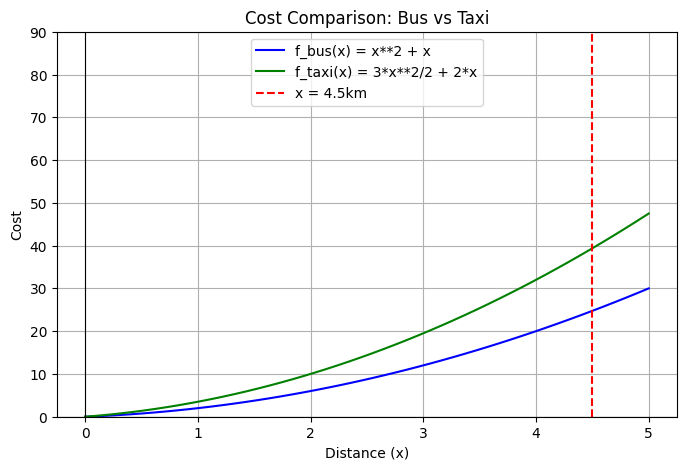

In [17]:
x_vals = np.linspace(0, 5)

# Use sp.lambdify to convert symbolic expressions to numpy functions
f_bus_np = sp.lambdify(x, f_bus, "numpy")
f_taxi_np = sp.lambdify(x, f_taxi, "numpy")

y_vals_bus = f_bus_np(x_vals)
y_vals_taxi = f_taxi_np(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals_bus, label=f"f_bus(x) = {f_bus}", color='blue')
plt.plot(x_vals, y_vals_taxi, label=f"f_taxi(x) = {f_taxi}", color='green')
plt.axvline(x=4.5, color='red', linestyle='--', linewidth=1.5, label='x = 4.5km')
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)
plt.ylim(0, 90)
plt.legend()

plt.grid(True)
plt.title("Cost Comparison: Bus vs Taxi")
plt.xlabel("Distance (x)")
plt.ylabel("Cost")
plt.show()

In [18]:
simplified_expr=sp.simplify(f_taxi/f_bus)
quotient, remainder = sp.div(simplified_expr.as_numer_denom()[0], simplified_expr.as_numer_denom()[1], domain='QQ')

print(f"f_taxi / f_bus= {quotient} ")

f_taxi / f_bus= 3/2 


```
f_taxi = 1.5 * f_bus
```

Acorss both short and long-distance journeys, bus transporation proves to be more cost effective. because taxi cost fuction is uniformly 1.5 times greater than the corresponding bus cost fuction.

## 3.Predicting Peak Travel Times Using Series Convergence

In [35]:
t=sp.symbols("t")

In [36]:
passenger_volume= 5 + 4* sp.sin(sp.pi*t) - (3/2)  * (t)**2 + (t**4)/4
sp.simplify(passenger_volume)

0.25*t**4 - 1.5*t**2 + 4.0*sin(pi*t) + 5.0

In [37]:
p_func=sp.lambdify(t,passenger_volume,"numpy") # symbolic expression to numeric function
time_vals=np.linspace(0,24,500)  # Time range

p_val=p_func(time_vals)   # passenger volumn values

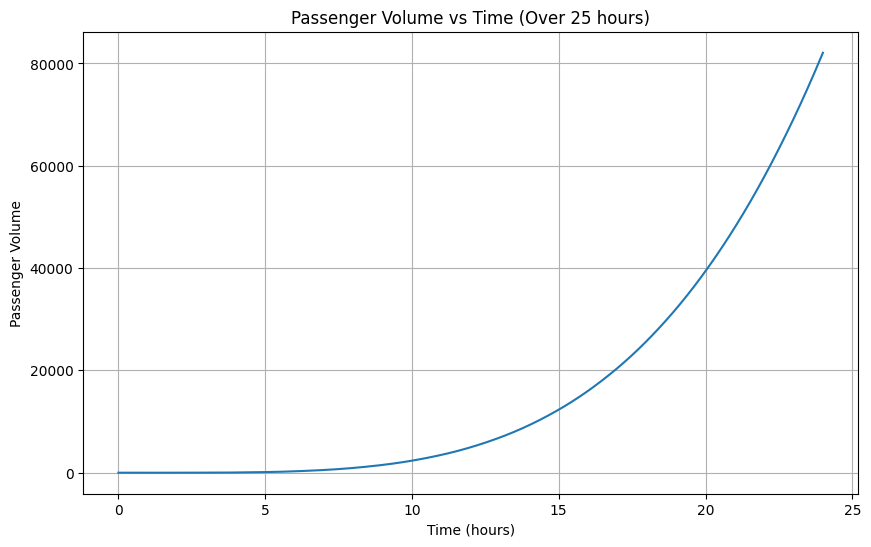

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(time_vals,p_val)
plt.xlabel("Time (hours)")
plt.ylabel("Passenger Volume")
plt.title("Passenger Volume vs Time (Over 25 hours)")
plt.grid(True)

In [47]:
result_at_t_equals_2 = p_func(2)
result_at_t_equals_3 = p_func(3)
result_at_t_equals_4 = p_func(4)
result_at_t_equal_6 = p_func(6)
result_at_t_equal_7 = p_func(7)

result_at_t_equals_8 = p_func(8)
result_at_t_equals_9=p_func(9)
result_at_t_equals_10= p_func(10)
print(f"Passenger volume at t=2 hours: {result_at_t_equals_2}")
print(f"Passenger volume at t=3 hours: {result_at_t_equals_3}")
print(f"Passenger volume at t=4 hours: {result_at_t_equals_4}")
print(f"Passenger volume at t=6 hours: {result_at_t_equal_6}")
print(f"Passenger volume at t=7 hours: {result_at_t_equal_7}")

print(f"Passenger volume at t=8 hours: {result_at_t_equals_8}")
print(f"Passenger volumn at t=9 hours: {result_at_t_equals_9}")
print(f"Passenger volumn at t=10 hours: {result_at_t_equals_10}")


Passenger volume at t=2 hours: 2.999999999999999
Passenger volume at t=3 hours: 11.750000000000002
Passenger volume at t=4 hours: 45.0
Passenger volume at t=6 hours: 275.0
Passenger volume at t=7 hours: 531.75
Passenger volume at t=8 hours: 933.0
Passenger volumn at t=9 hours: 1523.75
Passenger volumn at t=10 hours: 2355.0


In [48]:
sp.pi

pi

According to these results the 4-term approximation shows unrealistic exponential growth after t > 4 hours due to the t**4 term dominating  . base on the periodic sin(πt) , it create peaks in every two hours. but the polynomial terms prevents clear identification in graph because term gorows fast.

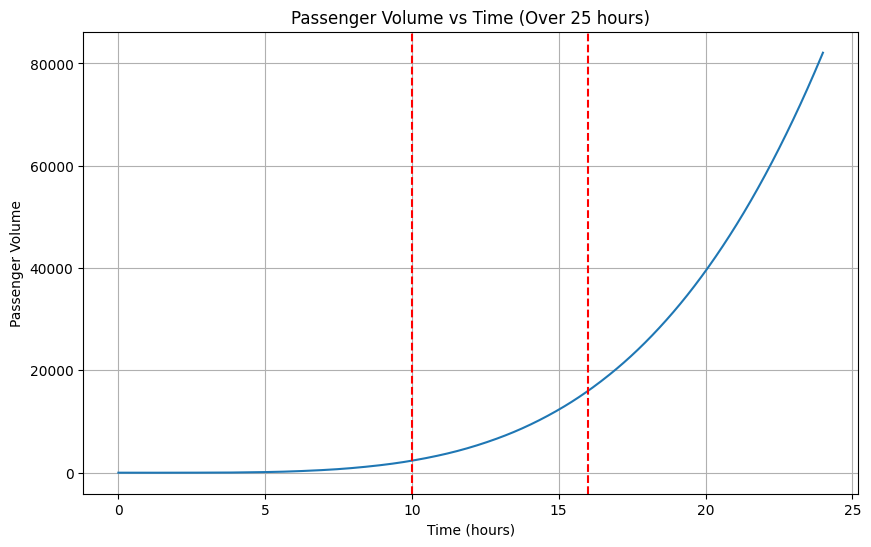

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(time_vals,p_val)
plt.axvline(x=10, color='red', linestyle='--', linewidth=1.5, label='x = 4.5km')
plt.axvline(x=16, color='red', linestyle='--', linewidth=1.5, label='x = 4.5km')

plt.xlabel("Time (hours)")
plt.ylabel("Passenger Volume")
plt.title("Passenger Volume vs Time (Over 25 hours)")
plt.grid(True)

## 4)

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Time settings
interval_minutes = 5
total_hours = 15  # 6 AM to 9 PM
N = int((total_hours * 60) / interval_minutes)

# Time array (in hours)
t = np.linspace(0, total_hours, N)

# Simulated boarding counts
bus_boarding = (
    40
    + 20 * np.sin(2 * np.pi * t / 24 * 2)
    + 15 * np.sin(2 * np.pi * t / 24 * 4)   # add some real world behavior
    + np.random.normal(0, 3, N)
)

taxi_boarding = (
    25
    + 15 * np.sin(2 * np.pi * t / 24 * 2)
    + 10 * np.sin(2 * np.pi * t / 24 * 4)
    + np.random.normal(0, 2, N)
)

# Fourier Transform
bus_fft = np.fft.fft(bus_boarding)
taxi_fft = np.fft.fft(taxi_boarding)

# Frequencies
freqs = np.fft.fftfreq(N, d=interval_minutes*60)


In [27]:
len(bus_boarding)

180

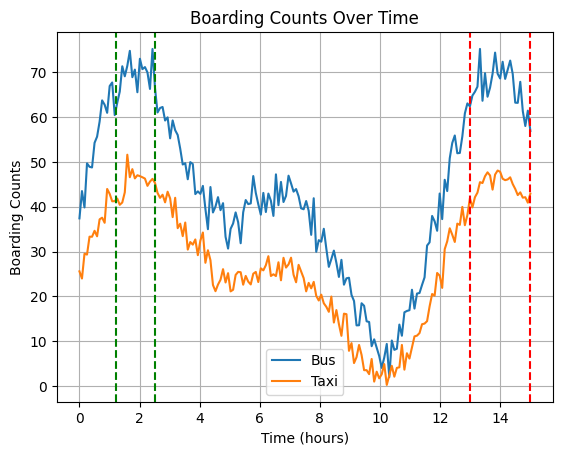

In [28]:
plt.plot(t,bus_boarding, label="Bus")
plt.plot(t,taxi_boarding, label="Taxi")
plt.xlabel("Time (hours)")
plt.ylabel("Boarding Counts")
plt.axvline(x=1.2, color='green', linestyle='--', linewidth=1.5)
plt.axvline(x=2.5, color='green', linestyle='--', linewidth=1.5)
plt.axvline(x=13, color='red', linestyle='--', linewidth=1.5)
plt.axvline(x=15, color='red', linestyle='--', linewidth=1.5)


plt.title("Boarding Counts Over Time")
plt.legend()
plt.grid(True)
plt.show()

X asis represents the 0 to 15 hours, Y axix represents the number of  passengers boarding buses and taxis.

Key Obervation:
  1) Morning Peak:
    Morning peak that indicate around 1.5- 2.5 time range. that time bus boarding cound is rise sharply to 70+ passengers indicating morning rush.
    the taxi also increase byt that indicate lower boarding cound (45), that suggesting taxis are used but less that buses during this peak times.
  2) Mid Peak:
    after 4 to 10 hours both bus and taxi counts drop significantly.that indicate a clear off peak period.In real life that time will be the late late morinig and early afternoon.
  3) Evening Peak:
    Both buses and taxis boarding counts rise again after 10. Again the morning pattern is reapeating. Same as the morning the buses boarding demand is greater than the taxis boarding demand.

  Here the both morning and evening bus has greater demand than the taxis. becase the taxi cost significantly higer than the bus cost, so people evevery time choose the cheap option.  i prooved that in pervoius cost analysis question.


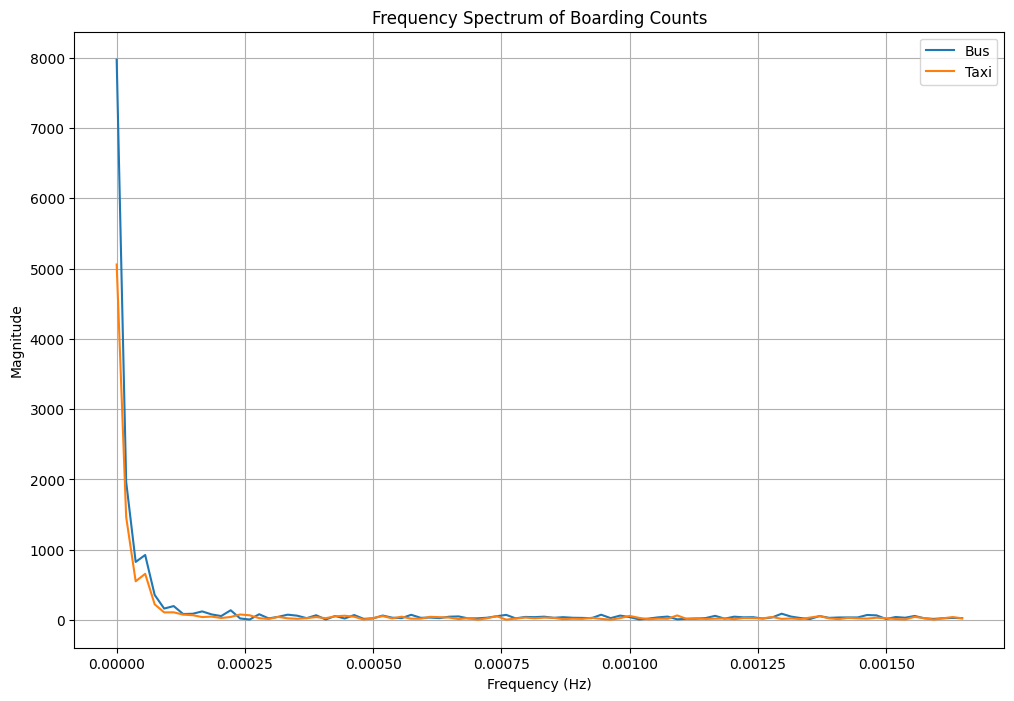

In [29]:
plt.figure(figsize=(12, 8))
plt.plot(freqs[:N//2], np.abs(bus_fft[:N//2]), label="Bus")
plt.plot(freqs[:N//2], np.abs(taxi_fft[:N//2]), label="Taxi")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum of Boarding Counts")
plt.legend()
plt.grid(True)
plt.show()


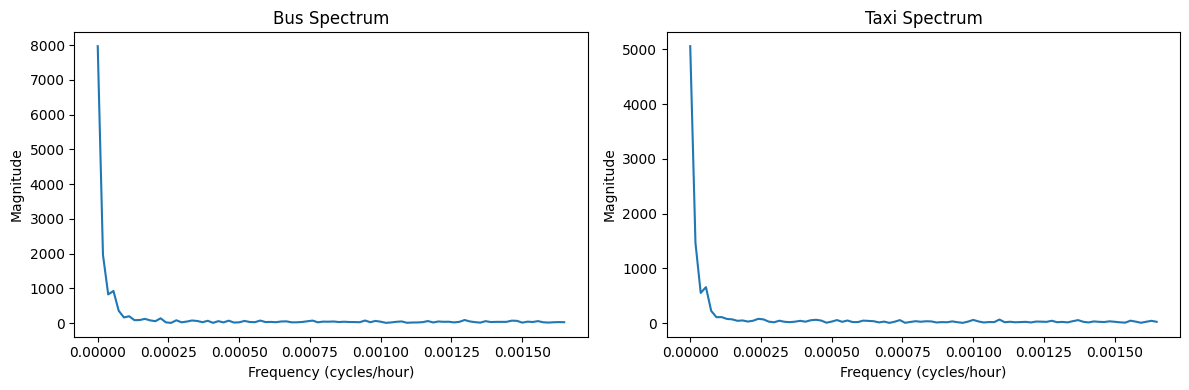

In [30]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(freqs[:90], np.abs(bus_fft[:90]), label='Bus')
plt.xlabel('Frequency (cycles/hour)'); plt.ylabel('Magnitude'); plt.title('Bus Spectrum')
plt.subplot(1,2,2)
plt.plot(freqs[:90], np.abs(taxi_fft[:90]), label='Taxi')
plt.xlabel('Frequency (cycles/hour)'); plt.ylabel('Magnitude'); plt.title('Taxi Spectrum')
plt.tight_layout(); plt.show()


X-axis represent how often that is repeats
y-axis represent how important that repetition
The behaviour corresponds to major daily travel patterns.

Overall the strong dominance at very low frequencies, which corresponds to long repeating cycles across the day. The higer peak indicates that bus demand is highly structured,  with clear and predictable during the morning and evening rush hours becuase magnitude of the bus spectrum is pertuculary high, showing that large number of passengers consistently rely on  buses during these periods.However demand remains relatively stable with little random fluctuation. in other hand taxi also shows a low frequency peak but with alower magnitude comapred to buses. Overall buses exhibit stronger, more predictable rush hour cylces, while taxis represent weaker but still noticeable daily rhythm.

The flat line in the spectum is indicate people don't suddenly appear or disappear in large numbers every few minutes.There is not sudden spikes or drops in demand at short intervals.

#### C)

However the fourier analysis confirms that passenger demand follows a strong and repeatable daily pattern rather than random fluctuations. This allows transport operators to schedule more buses and taxis during peak travel periods and reduce service during off peak hours to improce effiency and passenger experience.  

because daily pattern is moninant, the morning and evening pearks will happen again tomorrow.


for buses the strong dominance at very low frequencies indcate highly strucuted and repeatable cycles, with clear surges in passenger volume during the mornig and evening rush hours. This suggest bus operator shoudl allocate more vehicales and increase service frequency during these peaks, the spectrum flattens showing that bus usage remains relatively stable, which represent fewer buses can managable without decrease the service qulity.

in contrast, taxi spectrum also shows low frequency peaks aligned with morning and evening travel times, but the magnitude is lower which indicate taxi demand is less intense and more variable.


However the results suggest that bus services most uses for transport during rush hours, while taxi service is fluctuating base on passenger behaviour.


## 5)

### a)

In [31]:
img=cv2.imread("Vehicle_plate.png")
img

In [32]:
img_t_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_t_rgb

error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
cnvert_t_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img_t_rgb)
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(cnvert_t_gray,cmap="gray")
plt.title("Gray Image")
plt.show()

### b)

In [ ]:
fourier_transform=np.fft.fft2(cnvert_t_gray)
fourier_transform_shift=np.fft.fftshift(fourier_transform)

magnitude=np.log(1+np.abs(fourier_transform_shift))

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img_t_rgb)
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(magnitude,cmap="gray")
plt.title("Magnitude Spectrum")
plt.show()

### c)

In [ ]:
# Edge detection
edges = cv2.Canny(cnvert_t_gray, 100, 200)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Copy image for drawing
img_contour = img_t_rgb.copy()

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = w / h

    # Typical number plate shape
    if 2 < aspect_ratio < 5 and w > 100:
        cv2.rectangle(img_contour, (x,y), (x+w,y+h), (255,0,0), 2)

plt.figure()
plt.imshow(img_contour)
plt.title("Detected Number Plate Region")
plt.axis("off")
plt.show()


### d)

Mainly in DCT, it decompose the image into frequency componenets. The low frequency component represent smooth regions and the backgoup areas of the number plate , The High frequency component represent sharp edge, text characters and plate boundaries. However this reveals that number plate have a distinct structure. The transformed image center region represent to overall brightness and plate backgroud, and outer regions capture edges and character stokes.



If we use fourier and DCT together for recogniztion it,
  
* Enhance edges and character recognition
* Reduce noise
* Sparate useful plate information from irrelevant backgound details.
* Enhance plate localisation accuracy

Overall, these techiniques lead for traffic optimisation. For that this system helps to find,

* Vehical counting on specific routes  
* Identification of peak traffic periods
* Detecting frequently used routes

finally, system can optimize bus and taxi scheduling based on real traffic demand.










